## Coal thin section clustering

### Load image from .bmp file

In [1]:
import os
import imageio


image = imageio.imread("test_image_2.bmp")
print(type(image))
print(image.shape)

<class 'imageio.core.util.Array'>
(524, 648, 3)


### Convert image to np.array

In [4]:
import numpy as np 


image = np.array(image)

### Show image of coal

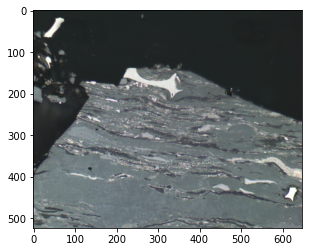

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)

### Perform SLIC clustering with varying number of clusters

<ipython-input-3-e65591f77857>:13: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


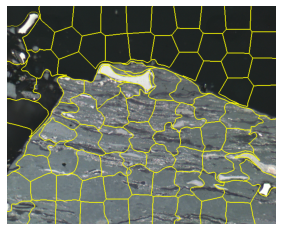

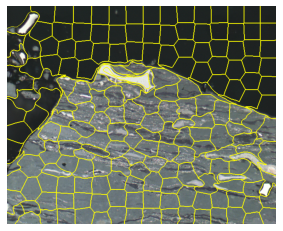

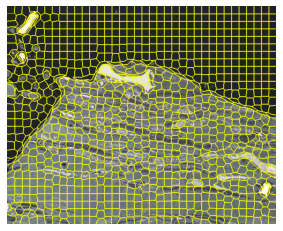

In [3]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

# loop over the number of segments
for numSegments in (100, 200, 1000):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("off")
# show the plots
plt.show()

### Make a Means shift filter to reduce over segmentation

In [9]:
def mean_shift(img, sp=30, sr=100):
    meanshift = cv2.pyrMeanShiftFiltering(img,sp=sp,sr=sr)    
    return meanshift

In [10]:
ms_img = mean_shift(image)

<IPython.core.display.Javascript object>

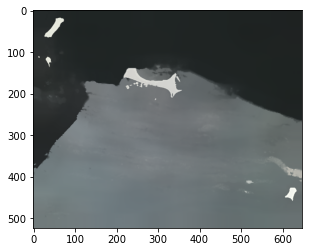

In [11]:
plt.imshow(ms_img)

<ipython-input-14-9fde6ce81284>:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(ms_img, n_segments = numSegments, sigma = 5)


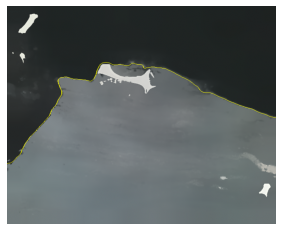

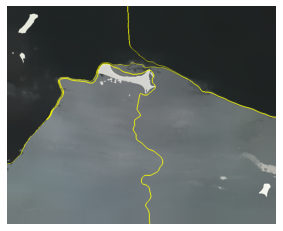

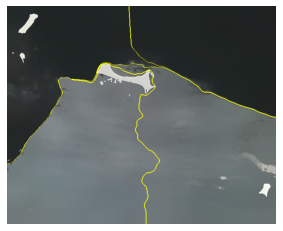

In [14]:
# loop over the number of segments
for numSegments in (2,3,4):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(ms_img, n_segments = numSegments, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(ms_img, segments))
    plt.axis("off")
# show the plots
plt.show()

In [38]:
def draw_contours(img):
    """Draw contours in given image using open-cv"""
    img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #set a thresh
    thresh = 100
    #get threshold image
    ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #create an empty image for contours
    img_contours = np.zeros(img.shape)
    # draw the contours on the empty image
    cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
    return img_contours

In [39]:
ms_img_cnt = draw_contours(ms_img)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


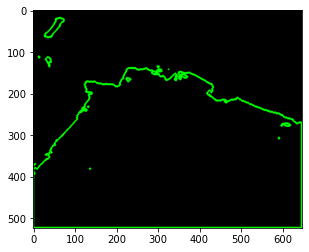

In [40]:
plt.imshow(ms_img_cnt)

In [10]:
len(np.unique(segments))

1032

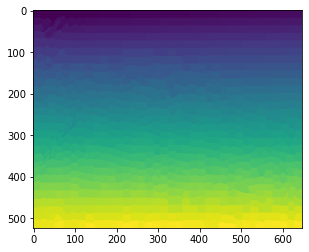

In [12]:
plt.imshow(segments, cmap="viridis")

In [17]:
import cv2
def segment_colorfulness(image, mask):
    # split the image into its respective RGB components, then mask
    # each of the individual RGB channels so we can compute
    # statistics only for the masked region
    (B, G, R) = cv2.split(image.astype("float"))
    R = np.ma.masked_array(R, mask=mask)
    G = np.ma.masked_array(B, mask=mask)
    B = np.ma.masked_array(B, mask=mask)
    # compute rg = R - G
    rg = np.absolute(R - G)
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
    # compute the mean and standard deviation of both `rg` and `yb`,
    # then combine them
    stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
    meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [25]:
segments = slic(image, n_segments = 10000, sigma = 5)
import tqdm
vis = np.zeros(image.shape[:2], dtype="float")
for v in tqdm(np.unique(segments)):
    # construct a mask for the segment so we can compute image
    # statistics for *only* the masked region
    mask = np.ones(image.shape[:2])
    mask[segments == v] = 0
    # compute the superpixel colorfulness, then update the
    # visualization array
    C = segment_colorfulness(image.copy(), mask)
    vis[segments == v] = C

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


In [26]:
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np
import argparse
import cv2

# scale the visualization image from an unrestricted floating point
# to unsigned 8-bit integer array so we can use it with OpenCV and
# display it to our screen
vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")
# overlay the superpixel colorfulness visualization on the original
# image
alpha = 0.6
overlay = np.dstack([vis] * 3)
output = image.copy()
cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output);

In [27]:
cv2.imshow("Input", image)
cv2.imshow("Visualization", vis, cmap=)
cv2.imshow("Output", output)
cv2.waitKey(0)

SyntaxError: invalid syntax (<ipython-input-27-4bad46f6b551>, line 2)

In [31]:
print(len(np.unique(vis)))
print(np.unique(vis))

189
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 162
 166 167 169 170 172 173 175 176 178 179 181 182 185 193 195 197 202 206
 207 211 216 221 226 227 228 252 255]


In [35]:
vis2 = vis.copy()

In [39]:
vis2[0,0]

14

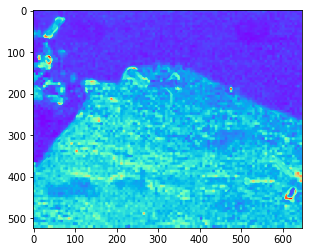

In [34]:
plt.imshow(vis, cmap="rainbow")

In [40]:
vals = np.unique(vis2)

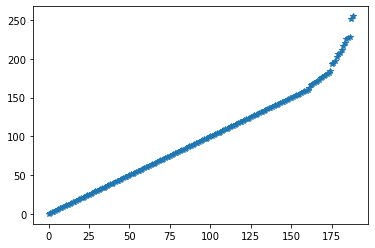

In [45]:
plt.plot(vals, "*")